## Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

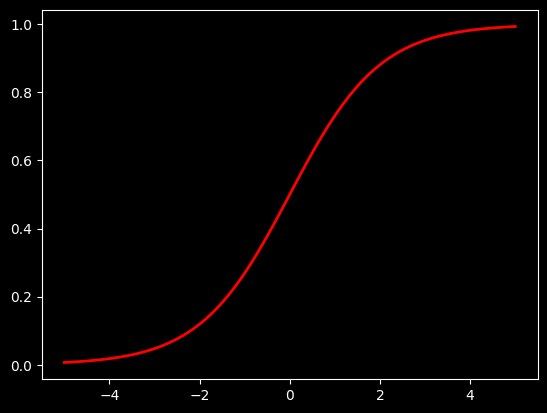

In [6]:
x = np.linspace(-5, 5, 100)

y = 1 / (1 + np.exp(-x))

plt.plot(x, y, color = 'red', linewidth = 2)
plt.style.use("dark_background")

plt.show()

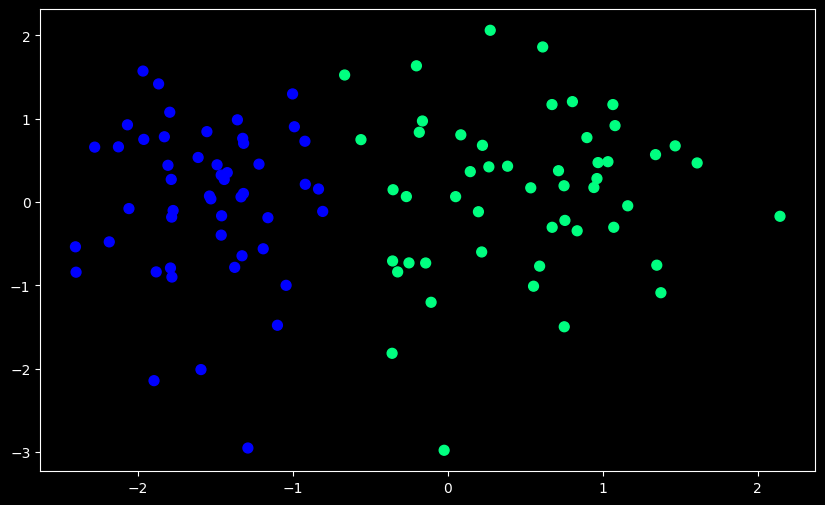

In [2]:
# Create a dataset for the example
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

plt.style.use("dark_background")

plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=50)

In [3]:
def step(z):
    return 1 if z > 0 else 0

def perceptron(X, y):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0, y.shape[0])
        y_pred = step(np.dot(X[j], weights))
        weights = weights + lr * (y[j] - y_pred) * X[j]
        
    return weights[0], weights[1:]
    

In [4]:
intercept, weights = perceptron(X, y)

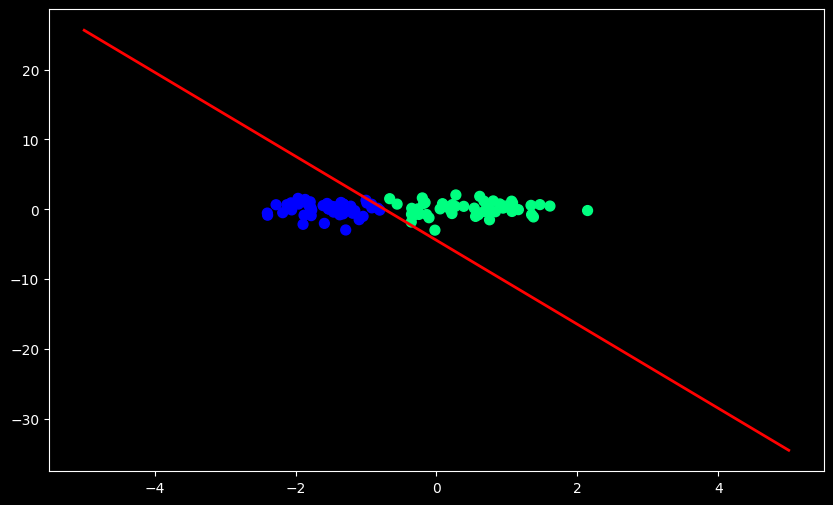

In [5]:
m = -weights[0] / weights[1]
b = -intercept / weights[1]

x_input = np.linspace(-5, 5, 100)
y_input = m * x_input + b

plt.style.use("dark_background")

plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=50)
plt.plot(x_input, y_input, color='red', linewidth=2)
plt.show()

## Now I will improve the same model through sigmoid function

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def perceptron_sig(X, y):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0, y.shape[0])
        y_pred = sigmoid(np.dot(X[j], weights))
        weights = weights + lr * (y[j] - y_pred) * X[j]

        
    return weights[0], weights[1:]
    

In [7]:
sig_intercept, sig_weights = perceptron_sig(X, y)

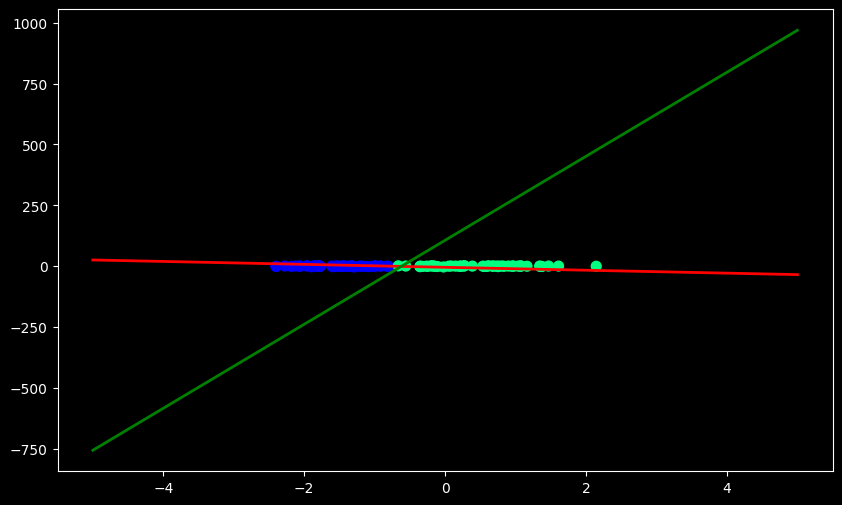

In [8]:
m = -sig_weights[0] / sig_weights[1]
b = -sig_intercept / sig_weights[1]

x_input_sig = np.linspace(-5, 5, 100)
y_input_sig = m * x_input_sig + b

plt.style.use("dark_background")

plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=50)
plt.plot(x_input, y_input, color='red', linewidth=2)
plt.plot(x_input_sig, y_input_sig, color='green', linewidth=2)
plt.show()